In [4]:
%matplotlib widget
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

In [5]:
%load_ext autoreload
%autoreload 1
%aimport help_func

from help_func import *


In [ ]:
method = 

In [ ]:
# Base folder
base_folder = Path.cwd().parent / "data" / "exp2_box_ISI300"

# Initialize collectors
all_eeg = []
all_gui = []

# For tracking trial offsets
trial_offset = 0

# Loop through sessions
for session_folder in sorted(base_folder.glob("session_*")):
    eeg_path = session_folder / "eeg_data.csv"
    gui_path = session_folder / "gui_data.csv"
    
    if eeg_path.exists() and gui_path.exists():
        df_eeg = pd.read_csv(eeg_path)
        df_gui = pd.read_csv(gui_path)

        # Interpolate plateau timestamps in-place
        df_eeg = interpolate_plateaus_in_ux(df_eeg)
        
        # Offset trials so they are globally unique
        df_gui['trial'] += trial_offset
        trial_offset = df_gui['trial'].max() + 1  # Update for next session

        # Append to lists
        all_eeg.append(df_eeg)
        all_gui.append(df_gui)

# Combine all sessions
df_eeg_combined = pd.concat(all_eeg, ignore_index=True)
df_gui_combined = pd.concat(all_gui, ignore_index=True)


In [ ]:
# Load the data
base_path = base_path = Path.cwd().parent  / "data"/ "exp2_box_ISI300" /"session_20250710_1721_Ege"
df_eeg= pd.read_csv(base_path / 'eeg_data.csv')
df_gui = pd.read_csv(base_path / 'gui_data.csv')

# Time start point = 0
df_gui['timestamp'] = df_gui['timestamp'] - df_eeg['timestamp_ux'].iloc[0]
df_eeg['timestamp_ux'] = df_eeg['timestamp_ux'] - df_eeg['timestamp_ux'].iloc[0]

# Interpolate plateaus in ux timestamp
df_eeg = interpolate_plateaus_in_ux(df_eeg)

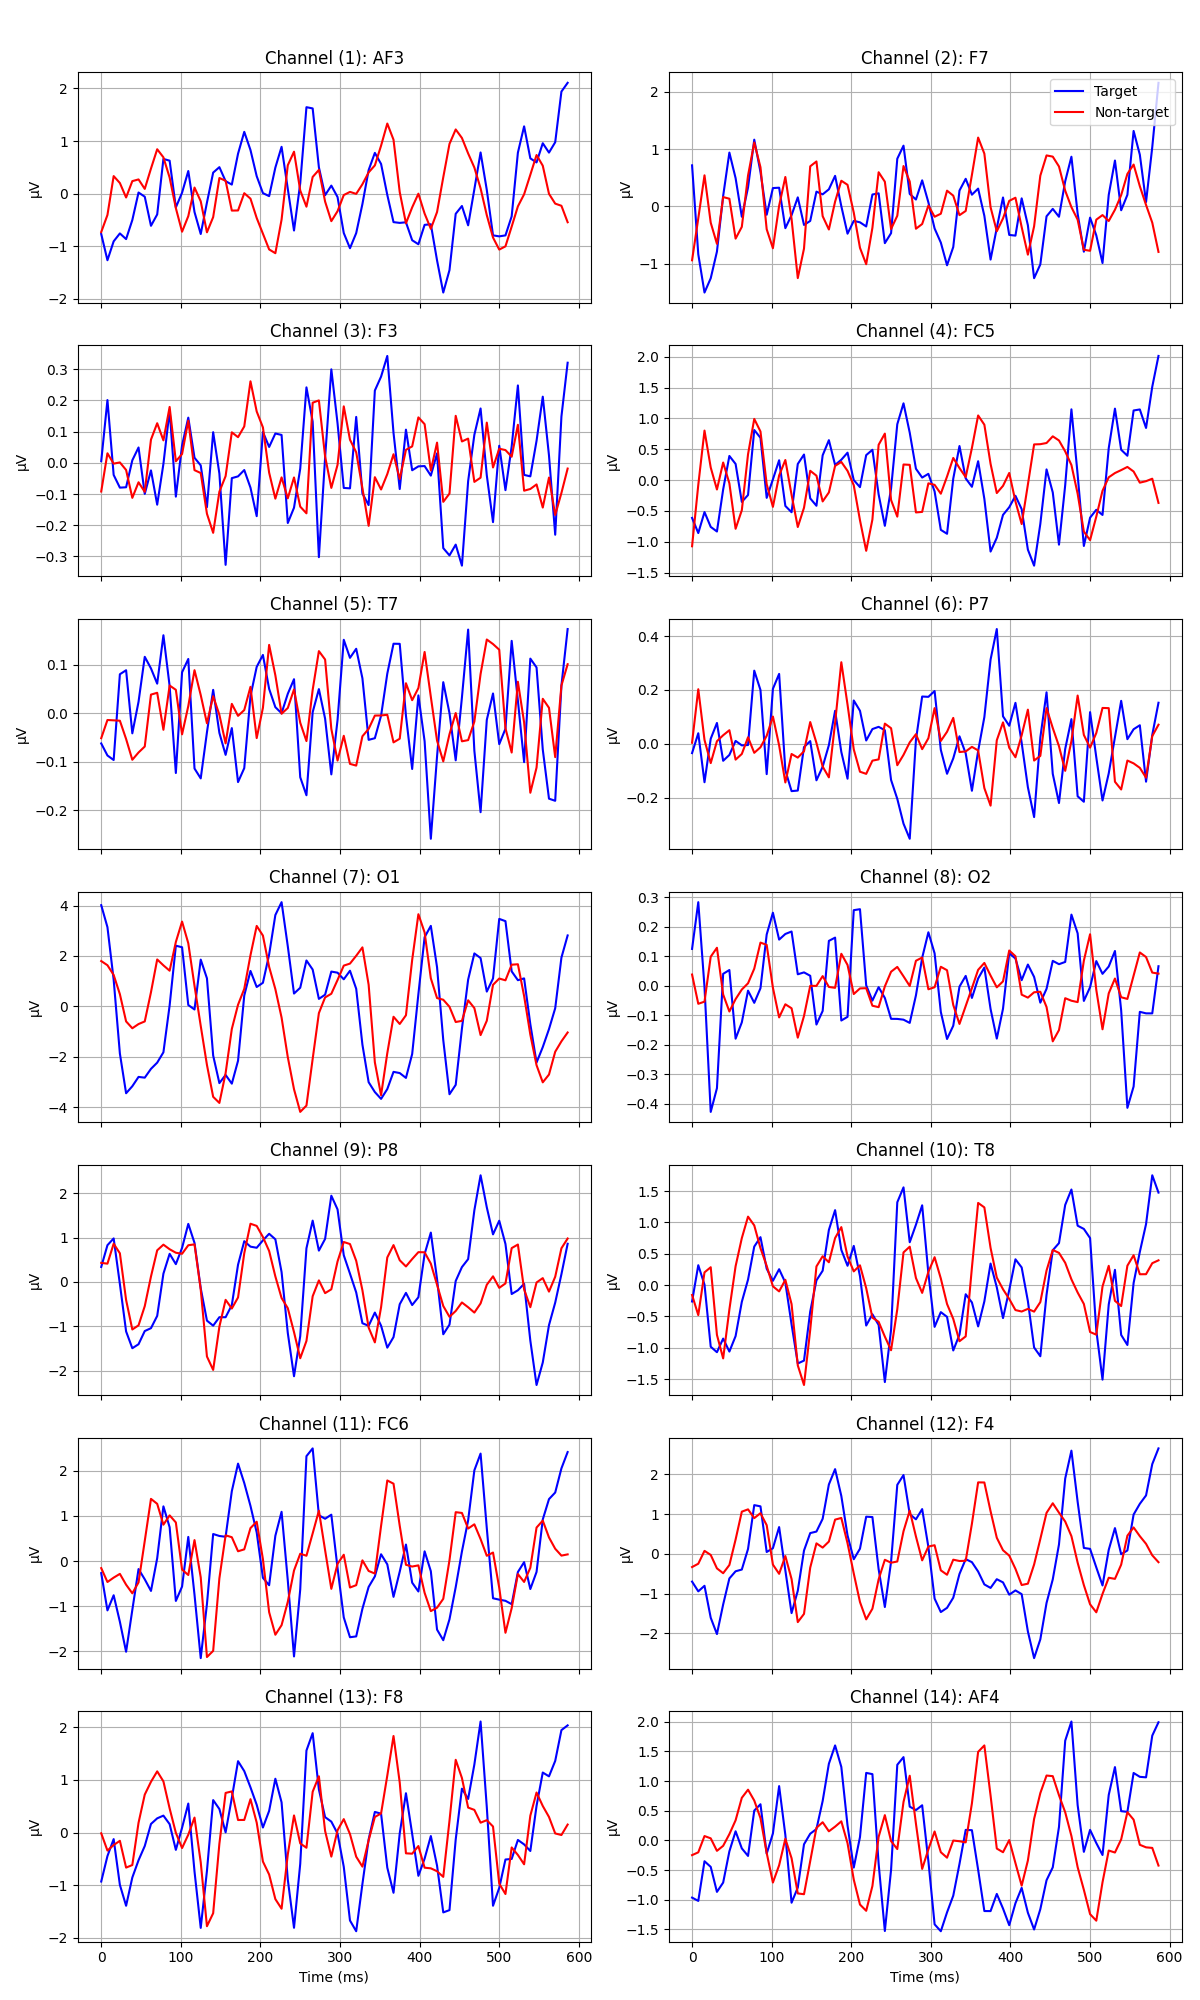

In [10]:
# Call the feature collection
X_target, X_nontarget = collect_target_nontarget_epochs(df_eeg, df_gui)

# Convert lists to arrays
X_target = np.array(X_target)        # shape: (n_trials, time, channels)
X_nontarget = np.array(X_nontarget)

# Compute mean across trials
mean_target = np.nanmean(X_target, axis=0)
mean_nontarget = np.nanmean(X_nontarget, axis=0)

# Channel labels in order
channel_names = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", 
                 "P8", "T8", "FC6", "F4", "F8", "AF4"]

# Time vector in ms
epoch_len = mean_target.shape[0]
fs = 128  # adjust if different
time_vector = np.arange(epoch_len) / fs * 1000

# Plot in 7x2 grid
fig, axes = plt.subplots(7, 2, figsize=(12, 20), sharex=True)

for i, ax in enumerate(axes.flat):
    if i >= len(channel_names):
        ax.axis('off')  # Hide unused subplot
        continue
    ax.plot(time_vector, mean_target[:, i], label='Target', color='blue')
    ax.plot(time_vector, mean_nontarget[:, i], label='Non-target', color='red')
    ax.set_title(f"Channel ({i+1}): {channel_names[i]}")
    ax.set_ylabel("µV")
    ax.grid(True)
    ax.tick_params(axis='y', which='both', labelleft=True)  # Show y-axis ticks

axes[-1, 0].set_xlabel("Time (ms)")
axes[-1, 1].set_xlabel("Time (ms)")
axes[0, 1].legend(loc='upper right')

plt.suptitle("Average of 15 Trials for Session 1", fontsize=16, y=1.02)
plt.tight_layout()

# Save as PNG
plt.savefig("average_15_trials_session1.png", dpi=300)
plt.show()

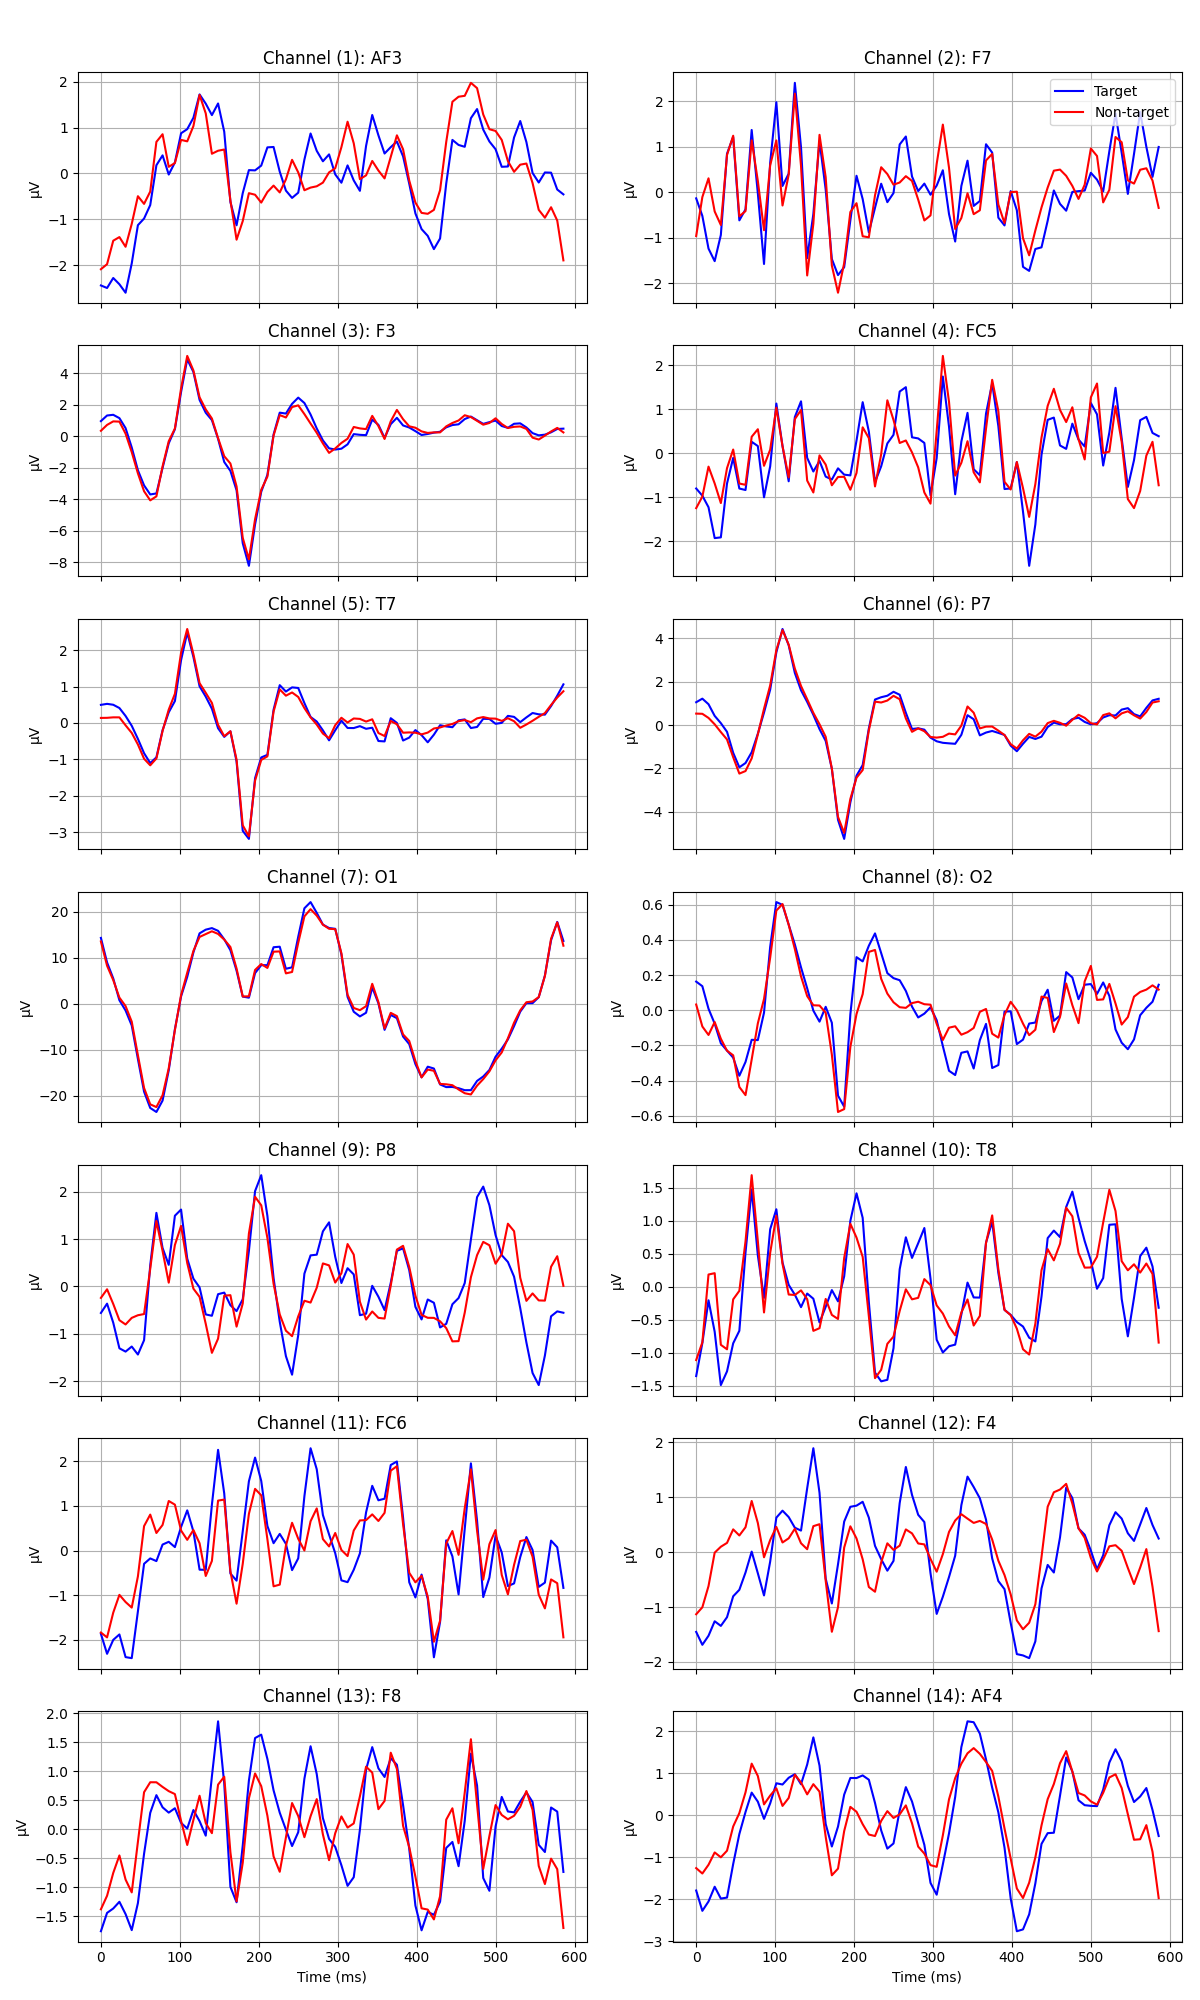

In [11]:
# Call the feature collection
X_target, X_nontarget = collect_target_nontarget_epochs(df_eeg_combined, df_gui_combined)

# Convert lists to arrays
X_target = np.array(X_target)        # shape: (n_trials, time, channels)
X_nontarget = np.array(X_nontarget)

# Compute mean across trials
mean_target = np.nanmean(X_target, axis=0)
mean_nontarget = np.nanmean(X_nontarget, axis=0)

# Channel labels in order
channel_names = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", 
                 "P8", "T8", "FC6", "F4", "F8", "AF4"]

# Time vector in ms
epoch_len = mean_target.shape[0]
fs = 128  # adjust if different
time_vector = np.arange(epoch_len) / fs * 1000

# Plot in 7x2 grid
fig, axes = plt.subplots(7, 2, figsize=(12, 20), sharex=True)

for i, ax in enumerate(axes.flat):
    if i >= len(channel_names):
        ax.axis('off')  # Hide unused subplot
        continue
    ax.plot(time_vector, mean_target[:, i], label='Target', color='blue')
    ax.plot(time_vector, mean_nontarget[:, i], label='Non-target', color='red')
    ax.set_title(f"Channel ({i+1}): {channel_names[i]}")
    ax.set_ylabel("µV")
    ax.grid(True)
    ax.tick_params(axis='y', which='both', labelleft=True)  # Show y-axis ticks

axes[-1, 0].set_xlabel("Time (ms)")
axes[-1, 1].set_xlabel("Time (ms)")
axes[0, 1].legend(loc='upper right')

plt.suptitle("Average of 4 Sessions , and 15 Trials per session", fontsize=16, y=1.02)
plt.tight_layout()

# Save as PNG
plt.savefig("average_4_sessions.png", dpi=300)
plt.show()